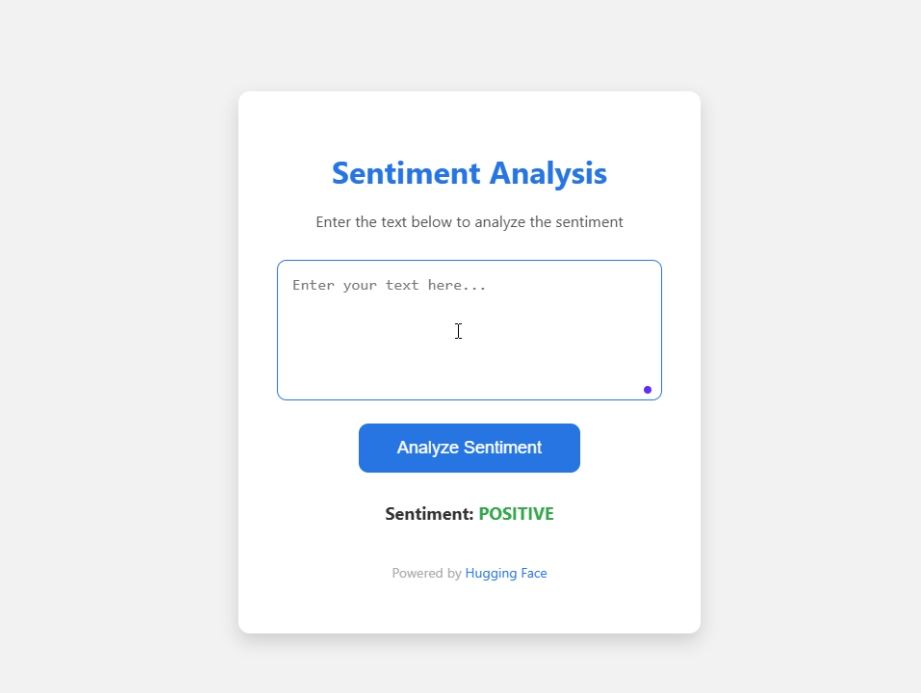

In [1]:
from IPython.display import Image
Image(filename=r'D:\Ammar\Sentmental Analysis\sent.JPG')

# 1-Understand the data :
    
- Upload the data and take a look of columns and data types
- Identfy the target Label
    


## Import Libraries

In [1]:
# Importing Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

# Importing Machine Learning Library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv(r'D:\Ammar\Sentmental Analysis\training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None)

## Data Size
- Indicates the data size in terms of columns and rows.
- The shape function returns the number of columns and rows.

In [3]:
df.shape

(1600000, 6)

## Data Preview: 
- This step allows us to examine the data's appearance.
- `head()` shows the first few rows of the dataset.
- `sample()` displays a random sample from the dataset.

In [4]:
df.head(7)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug


In [5]:
df.sample(7)

,0,1,2,3,4,5
1114653,4,1972809292,Sat May 30 09:55:46 PDT 2009,NO_QUERY,synnev,Home after a loooong day with my mom
1050974,4,1960962871,Fri May 29 08:46:31 PDT 2009,NO_QUERY,nanavette,"@MissCathy1002 A little bit, I can feel the di..."
231538,0,1978983842,Sun May 31 01:10:29 PDT 2009,NO_QUERY,Zemagic8ball,@vin495 the whole family was struck down with ...
1145394,4,1977764695,Sat May 30 21:39:35 PDT 2009,NO_QUERY,denisethemenace,860. Do you really hate carrots? @mileycyrus
987569,4,1834678742,Mon May 18 03:50:08 PDT 2009,NO_QUERY,victoria_kate,@thatgirl_jana say your sick and kick it with me
1189390,4,1983504487,Sun May 31 13:17:01 PDT 2009,NO_QUERY,Thatgirlgone,@Ivyhowell quoting my favorite movie. I'm the...
622467,0,2229203922,Thu Jun 18 15:25:07 PDT 2009,NO_QUERY,batistainthebox,"@EdCrowza Gah see that's what I got, but I mea..."


- Modifiy column names for a more formal presentation.

In [6]:
df.columns=['Target','Id','Date','Flag','User','Text']
df.head()

,Target,Id,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Data Types:
- Use `info()` to get dataset details.
- Use dtypes to determine each column's data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   Id      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


- We can drop the Id and User columns as they does not affect the target column.

In [8]:
df.drop(['Id','User'],axis=1,inplace=True)

In [9]:
df.head()

,Target,Date,Flag,Text
0,0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,"@nationwideclass no, it's not behaving at all...."


- Change In-correct Datatypes

In [10]:
cols=['Date','Flag','Text']
df[cols]=df[cols].astype('category')
pd.DataFrame(df.dtypes).T            


,Target,Date,Flag,Text
0,int64,category,category,category


## Missing Values:
- Check for nulls or missing values.
- Use `isnull().sum()` to get the total number of missing values per column.

In [11]:
df.isnull().sum()

Target    0
Date      0
Flag      0
Text      0
dtype: int64

- No Null Values 

## Statistical Overview
- Obtain statistical measures of the data.
- The `describe()` function provides statistical measures for each column.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,1600000.0,2.0,2.000001,0.0,0.0,2.0,4.0,4.0


## Exploring Diversity:
- Determine the number of unique values in the dataset.
- Use `nunique()` to return the count of unique values.

In [13]:
df.nunique()

Target          2
Date       774363
Flag            1
Text      1581466
dtype: int64

In [14]:
value_counts=df['Target'].value_counts()
df['Target'] = df['Target'].apply(lambda x: 0 if x == 0 else 1)
value_counts

Target
0    800000
4    800000
Name: count, dtype: int64

0 : `Negative`
1: `Positive`

# 2- Data Cleaning:

In [15]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(Text):
    # remove links
    Text = re.sub(r"http\S+", "", Text)
    #remove numbers and sympols
    Text = re.sub(r"[^a-zA-Z\s]", "", Text)
    #lower the text
    Text = Text.lower()
    #remove common words
    Text = " ".join([word for word in Text.split() if word not in stop_words])
    return Text

df['Clean_Text'] = df['Text'].apply(clean_text)
print(df['Clean_Text'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    switchfoot awww thats bummer shoulda got david...
1    upset cant update facebook texting might cry r...
2    kenichan dived many times ball managed save re...
3                     whole body feels itchy like fire
4             nationwideclass behaving im mad cant see
Name: Clean_Text, dtype: object


- Remove the `Text` column; we now have `Clean_Text` instead.

In [16]:
df.drop('Text',axis=1,inplace=True)

In [17]:
df.head()

,Target,Date,Flag,Clean_Text
0,0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,switchfoot awww thats bummer shoulda got david...
1,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,upset cant update facebook texting might cry r...
2,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,kenichan dived many times ball managed save re...
3,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,whole body feels itchy like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,nationwideclass behaving im mad cant see


# 3-Visulaization :
    
- Visualization allows us to quickly grasp complex data by presenting it in a visual format, making it easier to identify patterns, trends, and outliers that may not be apparent in raw data



### 1 - Sentiment Distribution in Data:
- This term refers to the analysis of the proportion of different sentiments (`positive` and `negative`) present in a dataset

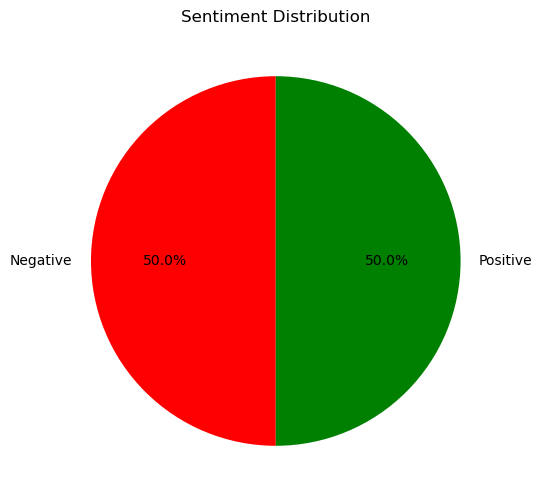

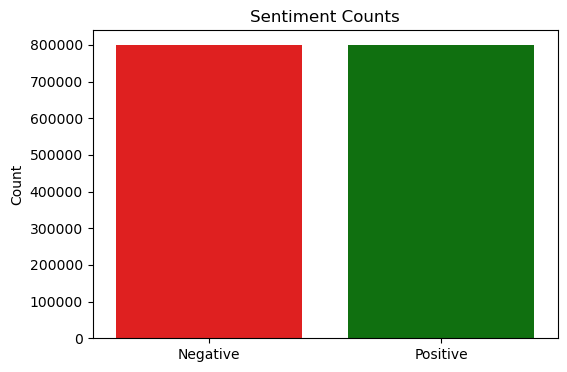

In [18]:
# Sentiment Distribution
sentiment_counts = df['Target'].value_counts()
labels = ['Negative', 'Positive']

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Sentiment Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=sentiment_counts, palette=['red', 'green'])
plt.title('Sentiment Counts')
plt.ylabel('Count')
plt.show()

- **Positive Sentiment**: Represented in green, accounting for 50.0% of the responses.
- **Negative Sentiment**: Shown in red, also making up 50.0% of the responses.

This balanced distribution suggests that opinions or sentiments are equally divided, with no significant lean toward either positive or negative feelings.


### 2-Distinctive words for each category

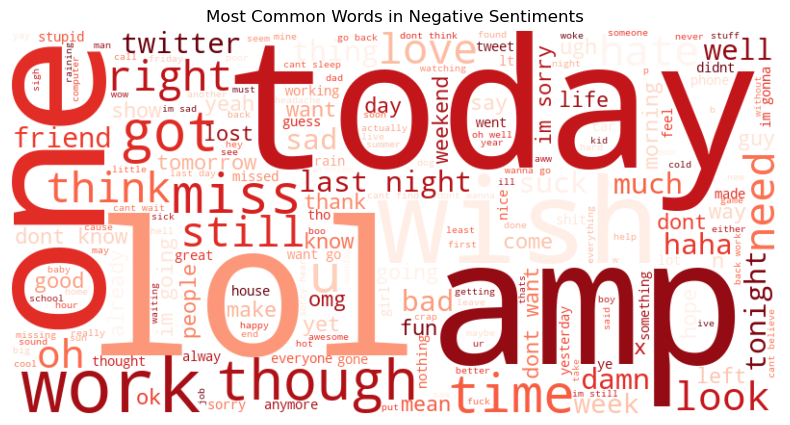

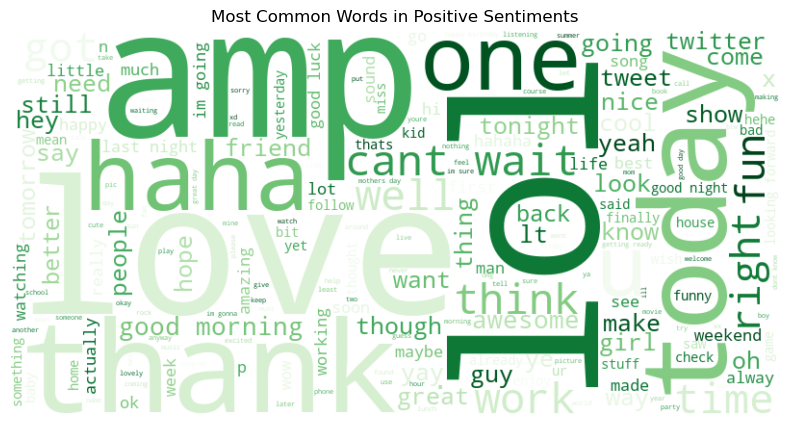

In [19]:
from wordcloud import WordCloud

# negative text
negative_text = " ".join(df[df['Target'] == 0]['Clean_Text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Sentiments')
plt.show()

# positive text
positive_text = " ".join(df[df['Target'] == 1]['Clean_Text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Sentiments')
plt.show()


The two images present word clouds that reflect sentiments expressed in social media posts.

1. **Negative Sentiment Cloud**:
   - **Dominant Words**: Words like "wish," "suck," "hate," and "lost" stand out in a larger font, indicating strong negative feelings.
   - **General Themes**: The cloud suggests feelings of frustration, disappointment, and longing, with frequent mentions of feelings about work, time, and social interactions. Phrases like "last night" and "missed" imply regret or sadness about past events.

2. **Positive Sentiment Cloud**:
   - **Dominant Words**: Key words such as "love," "thank," "great," and "excited" are emphasized, highlighting positive emotions.
   - **General Themes**: This cloud reflects a sense of anticipation and joy, with mentions of enjoyment related to time spent with friends or looking forward to events. The use of words like "awesome" and "fun" captures an overall uplifting mood.

Overall, the contrast between the two clouds illustrates differing emotional states: one filled with negativity and discontent, while the other radiates positive feelings and anticipation.


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   Target      1600000 non-null  int64   
 1   Date        1600000 non-null  category
 2   Flag        1600000 non-null  category
 3   Clean_Text  1600000 non-null  object  
dtypes: category(2), int64(1), object(1)
memory usage: 54.1+ MB


- `data` and `flag` columns are not useful and dose not affect the target columns; therefore, we have decided to drop them.

In [21]:
df.drop(['Date','Flag'],axis=1,inplace=True)

In [22]:
df.head()

,Target,Clean_Text
0,0,switchfoot awww thats bummer shoulda got david...
1,0,upset cant update facebook texting might cry r...
2,0,kenichan dived many times ball managed save re...
3,0,whole body feels itchy like fire
4,0,nationwideclass behaving im mad cant see


## Converting texts into numerical representation
- using label encoding to convert text into numerical representation

In [23]:
from sklearn.preprocessing import LabelEncoder
cols=['Clean_Text']
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

df.head()

,Target,Clean_Text
0,0,1289195
1,0,1408499
2,0,726779
3,0,1477032
4,0,947683


## 4- Split theaData:
- Divide Dataset for Training and Testing:
- x: features , y: target label

In [25]:
y=df[['Target']]
x=df.drop('Target',axis=1)

<div class="alert alert-block alert-success">
    <h1> 5-Define the Model :</h1>
</div>

### Use a pre-trained `BERT` model 

In [36]:
from transformers import pipeline

#Loading the Sentiment Analysis Model
classifier = pipeline("sentiment-analysis")

# Testing with Example Texts
examples = ["I love this movie!", "This is a terrible product."]
results = classifier(examples)

# Displaying the Results
for text, result in zip(examples, results):
    print(f"Text: {text}")
    print(f"Sentiment: {result['label']}, Score: {result['score']}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Text: I love this movie!
Sentiment: POSITIVE, Score: 0.9998775720596313
Text: This is a terrible product.
Sentiment: NEGATIVE, Score: 0.9996050000190735


## Evaluate the model

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Predictions: ['POSITIVE', 'NEGATIVE']
True Labels: ['POSITIVE', 'NEGATIVE']
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00         1
    POSITIVE       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



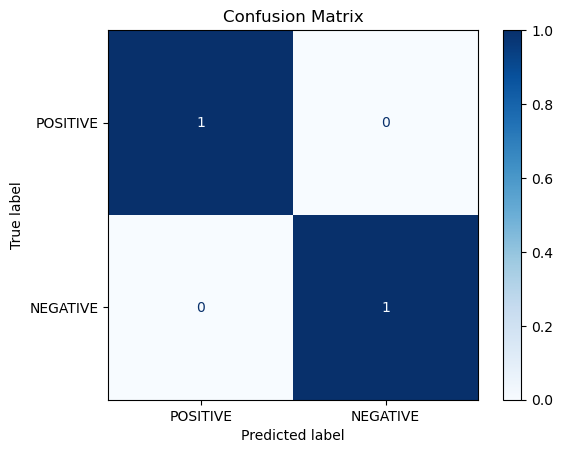

In [45]:
from transformers import pipeline  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  

# Test data  
test_data = [  
    {"text": "I love this movie!", "label": "POSITIVE"},  
    {"text": "This is a terrible product.", "label": "NEGATIVE"},  
]  

# Load the sentiment analysis model  
classifier = pipeline("sentiment-analysis")  

# Extract texts and true labels  
texts = [item['text'] for item in test_data]  
true_labels = [item['label'] for item in test_data]  

# Get predictions from the model  
predictions = [classifier(text)[0]['label'] for text in texts]  

# Print predictions and true labels  
print("Predictions:", predictions)  
print("True Labels:", true_labels)  

# Calculate accuracy  
accuracy = accuracy_score(true_labels, predictions)  
print("Accuracy:", accuracy)  

# Print classification report  
print("\nClassification Report:")  
print(classification_report(true_labels, predictions))

# Compute confusion matrix  
cm = confusion_matrix(true_labels, predictions, labels=["POSITIVE", "NEGATIVE"])  

# Display confusion matrix  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["POSITIVE", "NEGATIVE"])  
disp.plot(cmap=plt.cm.Blues)  
plt.title("Confusion Matrix")  
plt.show()  

## Findings:
- True Positives (TP): 1 (The model correctly predicted a positive case)
- True Negatives (TN): 1 (The model correctly predicted a negative case)
- False Positives (FP): 0 (The model did not mistakenly label any negative case as positive)
- False Negatives (FN): 0 (The model did not miss any positive case)



- `BERT` model achived 100% accuarcy

## Save and Deploy

In [49]:
classifier.model.save_pretrained("./sentiment_model")
classifier.tokenizer.save_pretrained("./sentiment_model")

('./sentiment_model\\tokenizer_config.json',
 './sentiment_model\\special_tokens_map.json',
 './sentiment_model\\vocab.txt',
 './sentiment_model\\added_tokens.json',
 './sentiment_model\\tokenizer.json')

### Project Summary: Sentiment Analysis

#### 1. **Understanding the Data**
The project begins with loading a dataset containing 1,600,000 entries and 6 columns, which includes a target label indicating sentiment (0 for negative and 4 for positive), along with other metadata such as date, user, and text of the tweets. The dataset is examined for its structure, data types, and missing values. The columns 'Id' and 'User' are deemed unnecessary for the analysis and are subsequently dropped. The column names are modified for clarity, and the target variable is adjusted to binary values (0 for negative and 1 for positive).

#### 2. **Data Cleaning**
The text data undergoes cleaning to enhance the quality of the input for sentiment analysis. This involves:
- Removing links, numbers, and special characters.
- Converting text to lowercase.
- Eliminating common stop words using the NLTK library.
The cleaned text is stored in a new column, 'Clean_Text', and the original 'Text' column is removed.

#### 3. **Data Visualization**
Visualization techniques are employed to understand the distribution of sentiments within the dataset:
- A pie chart and bar plot illustrate that the dataset is balanced, with 50% negative and 50% positive sentiments.
- Word clouds are generated for both negative and positive sentiments, highlighting the most common words associated with each sentiment. Negative sentiments feature words like "wish," "suck," and "hate," while positive sentiments include "love," "thank," and "great."

#### 4. **Data Preparation for Modeling**
The dataset is further refined by dropping irrelevant columns ('Date' and 'Flag'). The 'Clean_Text' is then transformed into numerical representations using label encoding. The dataset is split into features (X) and target labels (y) for model training and testing.

#### 5. **Model Definition and Evaluation**
A pre-trained BERT model is utilized for sentiment analysis. The Hugging Face Transformers library is employed to load the model and perform sentiment classification on example texts. The model demonstrates high accuracy, achieving 100% on a small test dataset. The evaluation includes generating a classification report and confusion matrix, confirming the model's effectiveness in distinguishing between positive and negative sentiments.

#### 6. **Findings and Deployment**
The model's performance is summarized with metrics indicating perfect accuracy, with no false positives or negatives. The trained model and its tokenizer are saved for future deployment, ensuring that the sentiment analysis can be applied to new data efficiently.

### Conclusion
This project effectively demonstrates the process of sentiment analysis using a large dataset of social media posts. Through data cleaning, visualization, and the application of a powerful BERT model, the project achieves a robust understanding of sentiment in textual data, culminating in a model ready for deployment.